In [2]:
import sys
import os

# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [3]:
from strategies.moving_average import MovingAverage
from strategies.momentum import MomentumStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd
import matplotlib as plt

In [17]:
import pandas as pd
from itertools import product

# Define tickers and parameter grid
tickers = tickers = [
    "AAPL", "ABT", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AJG", "AKAM",
    "ALB", "AMAT", "AMD", "AME", "AMGN", "AMT", "AMZN", "AON", "AOS", "APA",
    "APD", "APH", "ARE", "AVB", "AVY", "AXP", "AZO", "BA", "BAC", "BAX",
    "BBY", "BDX", "BEN", "BIIB", "BK", "BLK", "BMY", "BSX", "BXP", "C",
    "CAG", "CAH", "CAT", "CB", "CCI", "CDNS", "CHD", "CHRW", "CINF", "CL",
    "CLX", "CMI", "CNP", "COO", "COP", "COST", "CPB", "CPRT", "CSCO", "CTAS",
    "CTSH", "D", "DE", "DGX", "DHI", "DIS", "DLTR", "DOV", "DRI", "DTE",
    "DVA", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR",
    "EOG", "EQR", "ES", "ESS", "F", "FAST", "FCX", "FDX", "FE", "FFIV",
    "FITB", "FRT", "GD", "GE", "GILD", "GIS", "GPC", "GWW", "HAL", "HAS"
]  # Extend list as needed

# Parameter grid
short_windows = [5, 10, 20, 30, 50]
long_windows = [50, 100, 150, 200, 300]
modes = ['crossover', 'single']
invert_flags = [True, False]

# Store results
all_results = {}
best_params = []

# Loop over tickers
for ticker in tickers:
    print(f"\n🔍 Evaluating {ticker}")
    data_handler = DataHandler(ticker=ticker, start_date='2004-12-12', end_date='2015-12-12')
    data = data_handler.fetch_data()

    results = []

    # Test each parameter combination
    for short_w, long_w, mode, invert in product(short_windows, long_windows, modes, invert_flags):
        if mode == 'crossover' and short_w >= long_w:
            continue

        strategy = MovingAverage(short_window=short_w, long_window=long_w, mode=mode, invert_signals=invert)
        backtest = Backtest(data, strategy, plot_results=False)

        try:
            result = backtest.run()
            results.append({
                'Ticker': ticker,
                'Short Window': short_w,
                'Long Window': long_w,
                'Mode': mode,
                'Invert Signals': invert,
                **result  # Includes Final Value, Return, Sharpe Ratio, Max Drawdown, etc.
            })
        except Exception as e:
            print(f"❌ Error for {ticker} | short={short_w} long={long_w} mode={mode} invert={invert}: {e}")
            continue

    # Save all results for this ticker
    all_results[ticker] = results

    # Create DataFrame and find best based on Sharpe Ratio
    if results:
        df = pd.DataFrame(results)
        best_row = df.loc[df['Sharpe Ratio'].idxmax()]
        best_params.append(best_row)

        # Optional: display the per-stock comparison table
        print(df[['Short Window', 'Long Window', 'Mode', 'Invert Signals', 'Return', 'Sharpe Ratio', 'Max Drawdown']].sort_values(by='Sharpe Ratio', ascending=False).head())
    else:
        print(f"⚠️ No results for {ticker}")

# Compile best strategy per stock
best_params_df = pd.DataFrame(best_params)

print("\n=== ✅ Summary of Best Parameters by Ticker ===")
print(best_params_df[['Ticker', 'Short Window', 'Long Window', 'Mode', 'Invert Signals', 'Sharpe Ratio', 'Return', 'Max Drawdown']].round(4))




🔍 Evaluating AAPL


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals     Return  \
29            10          150  crossover           False  15.184561   
9              5          150  crossover           False  14.665477   
49            20          150  crossover           False  11.967918   
33            10          200  crossover           False  11.561681   
65            30          100  crossover           False  10.681628   

    Sharpe Ratio  Max Drawdown  
29      1.109179     -0.490607  
9       1.101425     -0.463434  
49      1.029837     -0.542199  
33      1.023296     -0.447550  
65      1.016034     -0.450273  

🔍 Evaluating ABT


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
52            20          200  crossover            True  0.763379   
90            50          200  crossover            True  0.694441   
32            10          200  crossover            True  0.644480   
56            20          300  crossover            True  0.486502   
94            50          300  crossover            True  0.475960   

    Sharpe Ratio  Max Drawdown  
52      0.497763     -0.147315  
90      0.474737     -0.268093  
32      0.439230     -0.148706  
56      0.410140     -0.164594  
94      0.402034     -0.268111  

🔍 Evaluating ADI


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  1.364842   
65            30          100  crossover           False  0.986940   
76            30          300  crossover            True  0.468998   
94            50          300  crossover            True  0.446178   
69            30          150  crossover           False  0.428480   

    Sharpe Ratio  Max Drawdown  
83      0.478789     -0.273750  
65      0.403376     -0.269282  
76      0.271975     -0.506515  
94      0.265373     -0.521715  
69      0.261232     -0.318970  

🔍 Evaluating ADM


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  1.180112   
5              5          100  crossover           False  1.011025   
65            30          100  crossover           False  0.941461   
45            20          100  crossover           False  0.828410   
87            50          150  crossover           False  0.827333   

    Sharpe Ratio  Max Drawdown  
83      0.439054     -0.353889  
5       0.390535     -0.373286  
65      0.383015     -0.376224  
45      0.356882     -0.398345  
87      0.356504     -0.414030  

🔍 Evaluating ADP


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
64            30          100  crossover            True  1.278127   
37            10          300  crossover           False  1.096042   
17             5          300  crossover           False  0.987925   
57            20          300  crossover           False  0.957676   
87            50          150  crossover           False  0.759224   

    Sharpe Ratio  Max Drawdown  
64      0.579512     -0.182286  
37      0.525966     -0.194534  
17      0.496920     -0.243517  
57      0.480606     -0.271456  
87      0.433156     -0.275853  

🔍 Evaluating ADSK


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
87            50          150  crossover           False  0.604391   
69            30          150  crossover           False  0.446772   
91            50          200  crossover           False  0.337439   
40            20           50  crossover            True  0.298192   
94            50          300  crossover            True  0.288927   

    Sharpe Ratio  Max Drawdown  
87      0.300365     -0.464576  
69      0.261014     -0.400362  
91      0.231220     -0.374637  
40      0.227446     -0.647536  
94      0.224551     -0.716039  

🔍 Evaluating AEE


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
64            30          100  crossover            True  0.328184   
77            30          300  crossover           False  0.156302   
44            20          100  crossover            True  0.159254   
68            30          150  crossover            True  0.116113   
95            50          300  crossover           False  0.079745   

    Sharpe Ratio  Max Drawdown  
64      0.237692     -0.442452  
77      0.164443     -0.321987  
44      0.163500     -0.410950  
68      0.144531     -0.556944  
95      0.120010     -0.400557  

🔍 Evaluating AEP


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
37            10          300  crossover           False  1.092862   
95            50          300  crossover           False  1.051010   
17             5          300  crossover           False  0.999072   
57            20          300  crossover           False  0.985771   
77            30          300  crossover           False  0.959172   

    Sharpe Ratio  Max Drawdown  
37      0.533084     -0.232940  
95      0.514479     -0.231573  
17      0.505176     -0.223816  
57      0.498879     -0.235865  
77      0.490194     -0.237904  

🔍 Evaluating AJG


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
91            50          200  crossover           False  1.057576   
76            30          300  crossover            True  0.851983   
56            20          300  crossover            True  0.720196   
94            50          300  crossover            True  0.594612   
87            50          150  crossover           False  0.599800   

    Sharpe Ratio  Max Drawdown  
91      0.485923     -0.248836  
76      0.468424     -0.188165  
56      0.408585     -0.216844  
94      0.376110     -0.306036  
87      0.345354     -0.246697  

🔍 Evaluating AKAM


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
49            20          150  crossover           False  4.141142   
33            10          200  crossover           False  3.823470   
65            30          100  crossover           False  3.446018   
29            10          150  crossover           False  3.349988   
73            30          200  crossover           False  3.040185   

    Sharpe Ratio  Max Drawdown  
49      0.613362     -0.458391  
33      0.598390     -0.426751  
65      0.574394     -0.648566  
29      0.565440     -0.507313  
73      0.550388     -0.503000  

🔍 Evaluating ALB


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
37            10          300  crossover           False  0.738540   
73            30          200  crossover           False  0.681681   
33            10          200  crossover           False  0.670445   
95            50          300  crossover           False  0.642685   
57            20          300  crossover           False  0.620920   

    Sharpe Ratio  Max Drawdown  
37      0.336436     -0.515981  
73      0.318042     -0.512042  
33      0.315688     -0.549106  
95      0.310061     -0.585055  
57      0.307092     -0.480246  

🔍 Evaluating AMAT


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
53            20          200  crossover           False  0.323401   
25            10          100  crossover           False  0.258869   
49            20          150  crossover           False  0.208228   
91            50          200  crossover           False  0.196538   
45            20          100  crossover           False  0.150372   

    Sharpe Ratio  Max Drawdown  
53      0.226923     -0.458118  
25      0.204875     -0.445116  
49      0.187281     -0.455821  
91      0.182520     -0.484340  
45      0.166976     -0.425139  

🔍 Evaluating AMD


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
69            30          150  crossover           False  1.016026   
49            20          150  crossover           False  0.820982   
87            50          150  crossover           False  0.727410   
29            10          150  crossover           False  0.390894   
33            10          200  crossover           False  0.343492   

    Sharpe Ratio  Max Drawdown  
69      0.362326     -0.549987  
49      0.331625     -0.559145  
87      0.315362     -0.582528  
29      0.251589     -0.562731  
33      0.238962     -0.595964  

🔍 Evaluating AME


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  2.348151   
91            50          200  crossover           False  2.513431   
87            50          150  crossover           False  2.469459   
77            30          300  crossover           False  2.391759   
73            30          200  crossover           False  2.337254   

    Sharpe Ratio  Max Drawdown  
83      0.659422     -0.212197  
91      0.652898     -0.326635  
87      0.650784     -0.309523  
77      0.642157     -0.277542  
73      0.633144     -0.287034  

🔍 Evaluating AMGN


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
76            30          300  crossover            True  0.689506   
90            50          200  crossover            True  0.690838   
86            50          150  crossover            True  0.702113   
72            30          200  crossover            True  0.476645   
68            30          150  crossover            True  0.453523   

    Sharpe Ratio  Max Drawdown  
76      0.393498     -0.472806  
90      0.391677     -0.385963  
86      0.391411     -0.373796  
72      0.309524     -0.390320  
68      0.295592     -0.390769  

🔍 Evaluating AMT


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
91            50          200  crossover           False  1.952535   
45            20          100  crossover           False  1.648811   
53            20          200  crossover           False  1.416307   
65            30          100  crossover           False  1.384187   
69            30          150  crossover           False  1.222592   

    Sharpe Ratio  Max Drawdown  
91      0.584847     -0.361844  
45      0.541014     -0.346583  
53      0.503484     -0.442274  
65      0.489207     -0.383799  
69      0.458404     -0.416767  

🔍 Evaluating AMZN


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  7.276981   
57            20          300  crossover           False  6.258821   
83            50          100  crossover           False  5.848667   
73            30          200  crossover           False  5.086287   
33            10          200  crossover           False  4.742802   

    Sharpe Ratio  Max Drawdown  
95      0.771928     -0.380775  
57      0.727919     -0.441475  
83      0.693757     -0.416309  
73      0.677070     -0.428989  
33      0.668728     -0.408417  

🔍 Evaluating AON


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
94            50          300  crossover            True  1.122339   
45            20          100  crossover           False  1.414429   
83            50          100  crossover           False  1.445881   
65            30          100  crossover           False  1.375044   
90            50          200  crossover            True  1.029260   

    Sharpe Ratio  Max Drawdown  
94      0.569272     -0.226627  
45      0.548714     -0.385817  
83      0.546044     -0.388846  
65      0.526296     -0.436231  
90      0.511499     -0.226643  

🔍 Evaluating AOS


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
87            50          150  crossover           False  6.854468   
83            50          100  crossover           False  4.880559   
91            50          200  crossover           False  4.588124   
53            20          200  crossover           False  4.008899   
33            10          200  crossover           False  3.686893   

    Sharpe Ratio  Max Drawdown  
87      0.875157     -0.431698  
83      0.769193     -0.484228  
91      0.740124     -0.584585  
53      0.721049     -0.482219  
33      0.701151     -0.493096  

🔍 Evaluating APA


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
60            30           50  crossover            True  0.157429   
20            10           50  crossover            True -0.108421   
44            20          100  crossover            True -0.141759   
76            30          300  crossover            True -0.122576   
40            20           50  crossover            True -0.145353   

    Sharpe Ratio  Max Drawdown  
60      0.192381     -0.589784  
20      0.108862     -0.648355  
44      0.105368     -0.691037  
76      0.102462     -0.597937  
40      0.100281     -0.647440  

🔍 Evaluating APD


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  1.727771   
73            30          200  crossover           False  1.626397   
49            20          150  crossover           False  1.377456   
69            30          150  crossover           False  1.349752   
53            20          200  crossover           False  1.213385   

    Sharpe Ratio  Max Drawdown  
83      0.586717     -0.263109  
73      0.569954     -0.330965  
49      0.529235     -0.310570  
69      0.522365     -0.357057  
53      0.486802     -0.307546  

🔍 Evaluating APH


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  3.082867   
69            30          150  crossover           False  2.581384   
65            30          100  crossover           False  2.424539   
73            30          200  crossover           False  2.409355   
33            10          200  crossover           False  2.347000   

    Sharpe Ratio  Max Drawdown  
83      0.666755     -0.421681  
69      0.613993     -0.396539  
65      0.598893     -0.318442  
73      0.598297     -0.462114  
33      0.594816     -0.317221  

🔍 Evaluating ARE


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
60            30           50  crossover            True  0.448170   
76            30          300  crossover            True  0.399221   
40            20           50  crossover            True  0.370681   
33            10          200  crossover           False  0.356965   
16             5          300  crossover            True  0.197904   

    Sharpe Ratio  Max Drawdown  
60      0.262402     -0.652936  
76      0.251857     -0.558706  
40      0.245021     -0.658766  
33      0.237676     -0.412504  
16      0.207778     -0.667585  

🔍 Evaluating AVB


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
87            50          150  crossover           False  2.754738   
73            30          200  crossover           False  2.490719   
77            30          300  crossover           False  1.988625   
69            30          150  crossover           False  2.310946   
95            50          300  crossover           False  1.757665   

    Sharpe Ratio  Max Drawdown  
87      0.655622     -0.345560  
73      0.641421     -0.422152  
77      0.616015     -0.275254  
69      0.609913     -0.451207  
95      0.586650     -0.314482  

🔍 Evaluating AVY


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
91            50          200  crossover           False  1.239718   
73            30          200  crossover           False  0.865259   
37            10          300  crossover           False  0.822681   
77            30          300  crossover           False  0.677869   
33            10          200  crossover           False  0.668655   

    Sharpe Ratio  Max Drawdown  
91      0.506951     -0.282290  
73      0.418964     -0.352992  
37      0.398456     -0.380467  
77      0.355657     -0.294778  
33      0.353286     -0.388334  

🔍 Evaluating AXP


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
77            30          300  crossover           False  1.801543   
57            20          300  crossover           False  1.739085   
95            50          300  crossover           False  1.626028   
37            10          300  crossover           False  1.516139   
73            30          200  crossover           False  1.506039   

    Sharpe Ratio  Max Drawdown  
77      0.565419     -0.215160  
57      0.557521     -0.222595  
95      0.534435     -0.216450  
37      0.519717     -0.224695  
73      0.506544     -0.272329  

🔍 Evaluating AZO


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  3.734187   
73            30          200  crossover           False  2.315815   
77            30          300  crossover           False  2.288592   
87            50          150  crossover           False  2.275918   
29            10          150  crossover           False  1.979339   

    Sharpe Ratio  Max Drawdown  
95      0.824199     -0.306357  
73      0.697219     -0.299778  
77      0.679152     -0.483487  
87      0.678150     -0.361444  
29      0.653849     -0.335495  

🔍 Evaluating BA


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
57            20          300  crossover           False  1.801453   
95            50          300  crossover           False  1.676439   
77            30          300  crossover           False  1.545666   
65            30          100  crossover           False  1.361523   
45            20          100  crossover           False  1.315575   

    Sharpe Ratio  Max Drawdown  
57      0.593263     -0.289631  
95      0.564563     -0.273188  
77      0.543019     -0.286687  
65      0.514539     -0.411678  
45      0.507190     -0.395039  

🔍 Evaluating BAC


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
45            20          100  crossover           False  0.516316   
95            50          300  crossover           False  0.426781   
25            10          100  crossover           False  0.452661   
73            30          200  crossover           False  0.426622   
53            20          200  crossover           False  0.415557   

    Sharpe Ratio  Max Drawdown  
45      0.276758     -0.519022  
95      0.272411     -0.338140  
25      0.263259     -0.541581  
73      0.261551     -0.445889  
53      0.258048     -0.436624  

🔍 Evaluating BAX


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
94            50          300  crossover            True  1.293148   
90            50          200  crossover            True  1.009417   
56            20          300  crossover            True  0.876500   
86            50          150  crossover            True  0.937283   
72            30          200  crossover            True  0.740188   

    Sharpe Ratio  Max Drawdown  
94      0.743966     -0.224732  
90      0.562499     -0.224739  
56      0.521433     -0.240406  
86      0.509365     -0.240417  
72      0.451064     -0.240412  

🔍 Evaluating BBY


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
82            50          100  crossover            True  0.797202   
86            50          150  crossover            True  0.727035   
64            30          100  crossover            True  0.671322   
56            20          300  crossover            True  0.421451   
94            50          300  crossover            True  0.301318   

    Sharpe Ratio  Max Drawdown  
82      0.327249     -0.573394  
86      0.314941     -0.595681  
64      0.305467     -0.527327  
56      0.257226     -0.665494  
94      0.231931     -0.664048  

🔍 Evaluating BDX


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
91            50          200  crossover           False  1.509927   
57            20          300  crossover           False  1.356489   
73            30          200  crossover           False  1.303884   
37            10          300  crossover           False  1.218728   
53            20          200  crossover           False  1.266286   

    Sharpe Ratio  Max Drawdown  
91      0.631797     -0.222912  
57      0.615494     -0.270148  
73      0.579427     -0.297295  
37      0.575350     -0.277928  
53      0.570937     -0.285799  

🔍 Evaluating BEN


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
5              5          100  crossover           False  0.823695   
77            30          300  crossover           False  0.582396   
53            20          200  crossover           False  0.571583   
45            20          100  crossover           False  0.548766   
49            20          150  crossover           False  0.535441   

    Sharpe Ratio  Max Drawdown  
5       0.377012     -0.435345  
77      0.309106     -0.325230  
53      0.304485     -0.338230  
45      0.293464     -0.456121  
49      0.289428     -0.371660  

🔍 Evaluating BIIB


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
37            10          300  crossover           False  2.866370   
73            30          200  crossover           False  2.594831   
83            50          100  crossover           False  2.254658   
17             5          300  crossover           False  2.539947   
20            10           50  crossover            True  1.666917   

    Sharpe Ratio  Max Drawdown  
37      0.573586     -0.540419  
73      0.566996     -0.518536  
83      0.548830     -0.588959  
17      0.545260     -0.550696  
20      0.522017     -0.285973  

🔍 Evaluating BK


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  0.462297   
73            30          200  crossover           False  0.446561   
60            30           50  crossover            True  0.358261   
69            30          150  crossover           False  0.396874   
87            50          150  crossover           False  0.388693   

    Sharpe Ratio  Max Drawdown  
83      0.273071     -0.291110  
73      0.267316     -0.491669  
60      0.252073     -0.464446  
69      0.249096     -0.331518  
87      0.248572     -0.416932  

🔍 Evaluating BLK


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
65            30          100  crossover           False  2.796938   
53            20          200  crossover           False  2.118101   
45            20          100  crossover           False  1.958821   
49            20          150  crossover           False  2.021810   
87            50          150  crossover           False  1.886417   

    Sharpe Ratio  Max Drawdown  
65      0.618412     -0.482528  
53      0.541984     -0.419859  
45      0.527007     -0.524444  
49      0.526407     -0.522687  
87      0.506578     -0.543550  

🔍 Evaluating BMY


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  2.454847   
77            30          300  crossover           False  1.905205   
57            20          300  crossover           False  1.704207   
91            50          200  crossover           False  1.554510   
73            30          200  crossover           False  1.403565   

    Sharpe Ratio  Max Drawdown  
95      0.677817     -0.449049  
77      0.607135     -0.397460  
57      0.575799     -0.402107  
91      0.548775     -0.370235  
73      0.524641     -0.315546  

🔍 Evaluating BSX


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
49            20          150  crossover           False  0.830215   
69            30          150  crossover           False  0.724758   
37            10          300  crossover           False  0.645182   
87            50          150  crossover           False  0.652942   
95            50          300  crossover           False  0.532170   

    Sharpe Ratio  Max Drawdown  
49      0.384249     -0.340671  
69      0.354675     -0.418219  
37      0.339115     -0.523474  
87      0.335825     -0.367560  
95      0.303426     -0.438045  

🔍 Evaluating BXP


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
49            20          150  crossover           False  1.532547   
87            50          150  crossover           False  1.562858   
69            30          150  crossover           False  1.462933   
33            10          200  crossover           False  1.121092   
29            10          150  crossover           False  1.173164   

    Sharpe Ratio  Max Drawdown  
49      0.491043     -0.408527  
87      0.488235     -0.445755  
69      0.476671     -0.438899  
33      0.432964     -0.409113  
29      0.429810     -0.472881  

🔍 Evaluating C


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  0.027998   
77            30          300  crossover           False -0.123724   
72            30          200  crossover            True -0.813605   
37            10          300  crossover           False -0.159219   
90            50          200  crossover            True -0.834554   

    Sharpe Ratio  Max Drawdown  
95      0.100452     -0.406467  
77      0.013674     -0.388069  
72     -0.003347     -0.977791  
37     -0.008939     -0.409245  
90     -0.022428     -0.977883  

🔍 Evaluating CAG


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  0.906541   
77            30          300  crossover           False  0.919220   
29            10          150  crossover           False  0.831575   
53            20          200  crossover           False  0.805678   
73            30          200  crossover           False  0.803189   

    Sharpe Ratio  Max Drawdown  
95      0.486508     -0.234922  
77      0.479469     -0.289112  
29      0.458288     -0.303593  
53      0.443660     -0.291735  
73      0.442347     -0.284806  

🔍 Evaluating CAH


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  1.790545   
87            50          150  crossover           False  1.340608   
91            50          200  crossover           False  1.308752   
73            30          200  crossover           False  1.171203   
69            30          150  crossover           False  1.038442   

    Sharpe Ratio  Max Drawdown  
83      0.670781     -0.277198  
87      0.598640     -0.257957  
91      0.579710     -0.259483  
73      0.544624     -0.327708  
69      0.492274     -0.343472  

🔍 Evaluating CAT


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  2.030834   
87            50          150  crossover           False  1.871303   
69            30          150  crossover           False  1.823273   
65            30          100  crossover           False  1.461527   
91            50          200  crossover           False  1.051552   

    Sharpe Ratio  Max Drawdown  
83      0.604256     -0.392660  
87      0.568626     -0.392621  
69      0.552043     -0.394034  
65      0.505970     -0.388130  
91      0.422166     -0.544767  

🔍 Evaluating CB


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
24            10          100  crossover            True  1.337593   
4              5          100  crossover            True  1.097120   
73            30          200  crossover           False  0.711316   
77            30          300  crossover           False  0.716866   
57            20          300  crossover           False  0.665117   

    Sharpe Ratio  Max Drawdown  
24      0.460766     -0.360215  
4       0.413119     -0.360207  
73      0.374167     -0.369512  
77      0.370787     -0.245877  
57      0.356339     -0.241591  

🔍 Evaluating CCI


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  2.713160   
87            50          150  crossover           False  1.825307   
91            50          200  crossover           False  1.702784   
65            30          100  crossover           False  1.761431   
95            50          300  crossover           False  1.533484   

    Sharpe Ratio  Max Drawdown  
83      0.658366     -0.306829  
87      0.560417     -0.335720  
91      0.543015     -0.306313  
65      0.521770     -0.412411  
95      0.519985     -0.327397  

🔍 Evaluating CDNS


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
25            10          100  crossover           False  2.118537   
45            20          100  crossover           False  1.401639   
29            10          150  crossover           False  1.155398   
95            50          300  crossover           False  1.164891   
73            30          200  crossover           False  1.079688   

    Sharpe Ratio  Max Drawdown  
25      0.569213     -0.379871  
45      0.459285     -0.383356  
29      0.427506     -0.427887  
95      0.422325     -0.391046  
73      0.412935     -0.355331  

🔍 Evaluating CHD


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  3.826803   
57            20          300  crossover           False  3.373295   
77            30          300  crossover           False  3.326886   
17             5          300  crossover           False  2.874207   
37            10          300  crossover           False  2.830516   

    Sharpe Ratio  Max Drawdown  
95      0.930642     -0.212853  
57      0.881164     -0.250964  
77      0.871971     -0.264178  
17      0.816675     -0.233195  
37      0.812712     -0.263662  

🔍 Evaluating CHRW


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
32            10          200  crossover            True  1.359394   
12             5          200  crossover            True  1.306957   
40            20           50  crossover            True  1.258613   
52            20          200  crossover            True  1.112737   
16             5          300  crossover            True  1.044224   

    Sharpe Ratio  Max Drawdown  
32      0.466890     -0.316320  
12      0.461060     -0.291506  
40      0.457053     -0.253879  
52      0.420876     -0.316360  
16      0.416298     -0.282884  

🔍 Evaluating CINF


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
91            50          200  crossover           False  1.588080   
95            50          300  crossover           False  1.209933   
77            30          300  crossover           False  1.160058   
73            30          200  crossover           False  1.168865   
57            20          300  crossover           False  1.030325   

    Sharpe Ratio  Max Drawdown  
91      0.735187     -0.225002  
95      0.629324     -0.216264  
77      0.612307     -0.199088  
73      0.605776     -0.278717  
57      0.566058     -0.238109  

🔍 Evaluating CL


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
69            30          150  crossover           False  1.102017   
91            50          200  crossover           False  1.073307   
73            30          200  crossover           False  1.000467   
94            50          300  crossover            True  0.547902   
87            50          150  crossover           False  0.772577   

    Sharpe Ratio  Max Drawdown  
69      0.537763     -0.315933  
91      0.529739     -0.325316  
73      0.506556     -0.314236  
94      0.443898     -0.200792  
87      0.430421     -0.414665  

🔍 Evaluating CLX


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
73            30          200  crossover           False  1.016163   
77            30          300  crossover           False  0.892549   
17             5          300  crossover           False  0.829496   
82            50          100  crossover            True  0.640081   
37            10          300  crossover           False  0.825802   

    Sharpe Ratio  Max Drawdown  
73      0.507681     -0.309775  
77      0.459218     -0.367764  
17      0.452497     -0.358807  
82      0.448101     -0.178108  
37      0.445809     -0.399779  

🔍 Evaluating CMI


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  6.548392   
13             5          200  crossover           False  3.732653   
49            20          150  crossover           False  3.846535   
9              5          150  crossover           False  3.229184   
69            30          150  crossover           False  3.027434   

    Sharpe Ratio  Max Drawdown  
83      0.784494     -0.410150  
13      0.640053     -0.419712  
49      0.633901     -0.478186  
9       0.593935     -0.500703  
69      0.573695     -0.620957  

🔍 Evaluating CNP


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  1.310442   
57            20          300  crossover           False  0.875831   
37            10          300  crossover           False  0.825184   
77            30          300  crossover           False  0.820846   
17             5          300  crossover           False  0.541936   

    Sharpe Ratio  Max Drawdown  
95      0.567831     -0.284562  
57      0.443284     -0.420785  
37      0.432448     -0.351320  
77      0.425281     -0.427543  
17      0.334740     -0.407046  

🔍 Evaluating COO


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
37            10          300  crossover           False  2.057825   
77            30          300  crossover           False  1.876989   
17             5          300  crossover           False  1.595062   
57            20          300  crossover           False  1.591944   
95            50          300  crossover           False  1.652901   

    Sharpe Ratio  Max Drawdown  
37      0.612322     -0.355689  
77      0.574334     -0.395355  
17      0.535415     -0.444248  
57      0.529611     -0.450294  
95      0.528961     -0.487215  

🔍 Evaluating COP


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
77            30          300  crossover           False  1.032298   
57            20          300  crossover           False  0.948645   
95            50          300  crossover           False  0.973273   
37            10          300  crossover           False  0.564797   
83            50          100  crossover           False  0.475573   

    Sharpe Ratio  Max Drawdown  
77      0.440338     -0.281157  
57      0.421138     -0.290521  
95      0.419543     -0.303627  
37      0.313402     -0.310741  
83      0.285237     -0.344610  

🔍 Evaluating COST


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
91            50          200  crossover           False  2.570164   
73            30          200  crossover           False  2.189660   
95            50          300  crossover           False  2.084123   
53            20          200  crossover           False  1.894761   
57            20          300  crossover           False  1.969341   

    Sharpe Ratio  Max Drawdown  
91      0.748212     -0.191648  
73      0.694146     -0.219776  
95      0.654077     -0.314796  
53      0.641382     -0.283610  
57      0.637866     -0.311614  

🔍 Evaluating CPB


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
87            50          150  crossover           False  0.635104   
95            50          300  crossover           False  0.559553   
36            10          300  crossover            True  0.312868   
40            20           50  crossover            True  0.347878   
91            50          200  crossover           False  0.378881   

    Sharpe Ratio  Max Drawdown  
87      0.383763     -0.295408  
95      0.348758     -0.390816  
36      0.284909     -0.220189  
40      0.276491     -0.329485  
91      0.276272     -0.363271  

🔍 Evaluating CPRT


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
52            20          200  crossover            True  1.260895   
90            50          200  crossover            True  1.092271   
86            50          150  crossover            True  1.130191   
72            30          200  crossover            True  1.101501   
82            50          100  crossover            True  0.915741   

    Sharpe Ratio  Max Drawdown  
52      0.526587     -0.360963  
90      0.496638     -0.351531  
86      0.492764     -0.367293  
72      0.487151     -0.360964  
82      0.423289     -0.418269  

🔍 Evaluating CSCO


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
53            20          200  crossover           False  0.337488   
95            50          300  crossover           False  0.313874   
73            30          200  crossover           False  0.302507   
44            20          100  crossover            True  0.309613   
56            20          300  crossover            True  0.252908   

    Sharpe Ratio  Max Drawdown  
53      0.236500     -0.358531  
95      0.227636     -0.379701  
73      0.223585     -0.369369  
44      0.220790     -0.512058  
56      0.203998     -0.529739  

🔍 Evaluating CTAS


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
82            50          100  crossover            True  1.256484   
86            50          150  crossover            True  1.033344   
64            30          100  crossover            True  1.012718   
95            50          300  crossover           False  0.765818   
37            10          300  crossover           False  0.725632   

    Sharpe Ratio  Max Drawdown  
82      0.499763     -0.385583  
86      0.450576     -0.377984  
64      0.431897     -0.368218  
95      0.403485     -0.370959  
37      0.388592     -0.451517  

🔍 Evaluating CTSH


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  3.662669   
73            30          200  crossover           False  2.772142   
91            50          200  crossover           False  2.483788   
45            20          100  crossover           False  2.064087   
53            20          200  crossover           False  1.801822   

    Sharpe Ratio  Max Drawdown  
83      0.682135     -0.373445  
73      0.633871     -0.399766  
91      0.597534     -0.382719  
45      0.522620     -0.557616  
53      0.517251     -0.454543  

🔍 Evaluating D


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  1.220021   
37            10          300  crossover           False  1.048849   
77            30          300  crossover           False  1.049666   
57            20          300  crossover           False  1.051887   
95            50          300  crossover           False  1.044728   

    Sharpe Ratio  Max Drawdown  
83      0.599556     -0.225589  
37      0.538868     -0.233968  
77      0.538713     -0.296530  
57      0.538014     -0.267375  
95      0.529669     -0.282008  

🔍 Evaluating DE


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
45            20          100  crossover           False  2.245182   
49            20          150  crossover           False  2.024641   
29            10          150  crossover           False  1.994123   
53            20          200  crossover           False  1.823853   
33            10          200  crossover           False  1.735186   

    Sharpe Ratio  Max Drawdown  
45      0.584543     -0.351419  
49      0.552113     -0.366526  
29      0.547890     -0.336028  
53      0.530922     -0.426756  
33      0.517374     -0.429750  

🔍 Evaluating DGX


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
76            30          300  crossover            True  1.323502   
52            20          200  crossover            True  1.277263   
94            50          300  crossover            True  1.081871   
56            20          300  crossover            True  1.072258   
72            30          200  crossover            True  0.990456   

    Sharpe Ratio  Max Drawdown  
76      0.572991     -0.237064  
52      0.554753     -0.238925  
94      0.512487     -0.225337  
56      0.497410     -0.221518  
72      0.478188     -0.204050  

🔍 Evaluating DHI


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
20            10           50  crossover            True  1.036697   
40            20           50  crossover            True  0.765014   
64            30          100  crossover            True  0.597774   
82            50          100  crossover            True  0.561260   
52            20          200  crossover            True  0.307568   

    Sharpe Ratio  Max Drawdown  
20      0.355857     -0.755607  
40      0.321908     -0.728912  
64      0.300077     -0.698747  
82      0.294042     -0.684258  
52      0.264781     -0.792286  

🔍 Evaluating DIS


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
87            50          150  crossover           False  3.571949   
83            50          100  crossover           False  2.794886   
17             5          300  crossover           False  2.854254   
95            50          300  crossover           False  2.696440   
37            10          300  crossover           False  2.748822   

    Sharpe Ratio  Max Drawdown  
87      0.892651     -0.223346  
83      0.791557     -0.244391  
17      0.786508     -0.304767  
95      0.769906     -0.292642  
37      0.766602     -0.294279  

🔍 Evaluating DLTR


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
25            10          100  crossover           False  5.885128   
69            30          150  crossover           False  6.572941   
87            50          150  crossover           False  6.000677   
83            50          100  crossover           False  5.237127   
45            20          100  crossover           False  4.949467   

    Sharpe Ratio  Max Drawdown  
25      0.887352     -0.283682  
69      0.885209     -0.233934  
87      0.854832     -0.233492  
83      0.845780     -0.254034  
45      0.831926     -0.287396  

🔍 Evaluating DOV


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  1.314359   
65            30          100  crossover           False  1.048707   
45            20          100  crossover           False  0.934785   
77            30          300  crossover           False  0.756160   
37            10          300  crossover           False  0.683726   

    Sharpe Ratio  Max Drawdown  
83      0.510913     -0.278332  
65      0.446622     -0.304739  
45      0.420160     -0.305145  
77      0.363948     -0.406687  
37      0.350846     -0.341464  

🔍 Evaluating DRI


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
32            10          200  crossover            True  1.630110   
90            50          200  crossover            True  1.301240   
52            20          200  crossover            True  1.380280   
86            50          150  crossover            True  1.136634   
72            30          200  crossover            True  0.893303   

    Sharpe Ratio  Max Drawdown  
32      0.472293     -0.590452  
90      0.439293     -0.478894  
52      0.438579     -0.616298  
86      0.407438     -0.606070  
72      0.360969     -0.549040  

🔍 Evaluating DTE


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  1.926713   
57            20          300  crossover           False  1.664216   
37            10          300  crossover           False  1.548308   
17             5          300  crossover           False  1.550289   
77            30          300  crossover           False  1.467645   

    Sharpe Ratio  Max Drawdown  
95      0.766721     -0.214598  
57      0.701061     -0.260773  
37      0.670715     -0.282565  
17      0.670628     -0.231500  
77      0.652410     -0.288891  

🔍 Evaluating DVA


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  1.082331   
94            50          300  crossover            True  0.827043   
69            30          150  crossover           False  0.831285   
90            50          200  crossover            True  0.648562   
65            30          100  crossover           False  0.724387   

    Sharpe Ratio  Max Drawdown  
83      0.461906     -0.402119  
94      0.422145     -0.253898  
69      0.400796     -0.446462  
90      0.379404     -0.238171  
65      0.370375     -0.369257  

🔍 Evaluating EA


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  1.663676   
37            10          300  crossover           False  1.539942   
91            50          200  crossover           False  1.035413   
17             5          300  crossover           False  0.990208   
83            50          100  crossover           False  0.980791   

    Sharpe Ratio  Max Drawdown  
95      0.499483     -0.367962  
37      0.478019     -0.438405  
91      0.385745     -0.491458  
17      0.383669     -0.595136  
83      0.374356     -0.597473  

🔍 Evaluating EBAY


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
87            50          150  crossover           False  1.186566   
91            50          200  crossover           False  0.935064   
57            20          300  crossover           False  0.714063   
77            30          300  crossover           False  0.587555   
73            30          200  crossover           False  0.494369   

    Sharpe Ratio  Max Drawdown  
87      0.423108     -0.326324  
91      0.372337     -0.287909  
57      0.329714     -0.295291  
77      0.298003     -0.323892  
73      0.272143     -0.342819  

🔍 Evaluating ECL


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
91            50          200  crossover           False  1.494895   
68            30          150  crossover            True  0.966867   
86            50          150  crossover            True  0.952420   
95            50          300  crossover           False  1.080697   
48            20          150  crossover            True  0.763901   

    Sharpe Ratio  Max Drawdown  
91      0.545353     -0.327614  
68      0.507934     -0.259648  
86      0.505989     -0.233615  
95      0.448671     -0.339200  
48      0.429905     -0.296594  

🔍 Evaluating ED


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
90            50          200  crossover            True  0.583094   
72            30          200  crossover            True  0.536014   
52            20          200  crossover            True  0.451837   
56            20          300  crossover            True  0.534387   
36            10          300  crossover            True  0.393454   

    Sharpe Ratio  Max Drawdown  
90      0.488019     -0.204382  
72      0.471343     -0.143753  
52      0.414613     -0.134084  
56      0.411851     -0.207567  
36      0.339690     -0.174276  

🔍 Evaluating EFX


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
73            30          200  crossover           False  1.872395   
91            50          200  crossover           False  1.696790   
53            20          200  crossover           False  1.691035   
57            20          300  crossover           False  1.576609   
25            10          100  crossover           False  1.469981   

    Sharpe Ratio  Max Drawdown  
73      0.663829     -0.398966  
91      0.638851     -0.326064  
53      0.628432     -0.425050  
57      0.624452     -0.349533  
25      0.590209     -0.355230  

🔍 Evaluating EIX


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
87            50          150  crossover           False  0.669938   
69            30          150  crossover           False  0.577602   
49            20          150  crossover           False  0.541286   
77            30          300  crossover           False  0.498161   
83            50          100  crossover           False  0.464116   

    Sharpe Ratio  Max Drawdown  
87      0.374672     -0.273152  
69      0.344800     -0.285775  
49      0.332456     -0.281016  
77      0.315948     -0.230293  
83      0.300886     -0.361511  

🔍 Evaluating EL


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  2.081318   
64            30          100  crossover            True  1.589067   
48            20          150  crossover            True  1.528379   
91            50          200  crossover           False  1.609380   
77            30          300  crossover           False  1.525688   

    Sharpe Ratio  Max Drawdown  
95      0.550881     -0.436476  
64      0.521527     -0.447027  
48      0.506614     -0.480236  
91      0.498870     -0.443557  
77      0.477898     -0.474674  

🔍 Evaluating EMN


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
45            20          100  crossover           False  2.439316   
65            30          100  crossover           False  1.346107   
69            30          150  crossover           False  1.161503   
73            30          200  crossover           False  1.037802   
91            50          200  crossover           False  0.816017   

    Sharpe Ratio  Max Drawdown  
45      0.611158     -0.305823  
65      0.455334     -0.330400  
69      0.424407     -0.381456  
73      0.401505     -0.411981  
91      0.354709     -0.428784  

🔍 Evaluating EMR


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
91            50          200  crossover           False  1.505952   
53            20          200  crossover           False  1.065905   
73            30          200  crossover           False  0.928134   
87            50          150  crossover           False  0.841932   
77            30          300  crossover           False  0.640452   

    Sharpe Ratio  Max Drawdown  
91      0.559613     -0.310560  
53      0.465209     -0.313602  
73      0.427028     -0.343095  
87      0.405438     -0.325270  
77      0.345461     -0.452838  

🔍 Evaluating EOG


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
45            20          100  crossover           False  1.279757   
65            30          100  crossover           False  1.114815   
61            30           50  crossover           False  1.033142   
69            30          150  crossover           False  0.890038   
49            20          150  crossover           False  0.804937   

    Sharpe Ratio  Max Drawdown  
45      0.421482     -0.371498  
65      0.395427     -0.455189  
61      0.376533     -0.553640  
69      0.352983     -0.441826  
49      0.337063     -0.492171  

🔍 Evaluating EQR


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  1.798749   
87            50          150  crossover           False  1.650565   
91            50          200  crossover           False  1.335640   
73            30          200  crossover           False  1.069983   
33            10          200  crossover           False  1.027203   

    Sharpe Ratio  Max Drawdown  
83      0.496648     -0.513933  
87      0.476955     -0.434611  
91      0.434880     -0.429774  
73      0.390688     -0.417353  
33      0.389244     -0.401482  

🔍 Evaluating ES


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
95            50          300  crossover           False  2.117512   
57            20          300  crossover           False  2.061491   
77            30          300  crossover           False  2.012539   
17             5          300  crossover           False  1.998308   
37            10          300  crossover           False  1.906386   

    Sharpe Ratio  Max Drawdown  
95      0.760765     -0.286575  
57      0.753419     -0.258931  
77      0.743439     -0.277683  
17      0.741759     -0.246133  
37      0.722189     -0.266324  

🔍 Evaluating ESS


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  2.559755   
87            50          150  crossover           False  2.424351   
91            50          200  crossover           False  2.208885   
73            30          200  crossover           False  1.869268   
33            10          200  crossover           False  1.692870   

    Sharpe Ratio  Max Drawdown  
83      0.618939     -0.441640  
87      0.612703     -0.346413  
91      0.579413     -0.368760  
73      0.540440     -0.366322  
33      0.532966     -0.368279  

🔍 Evaluating F


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
25            10          100  crossover           False  1.707492   
95            50          300  crossover           False  1.296330   
9              5          150  crossover           False  1.155012   
45            20          100  crossover           False  1.010469   
29            10          150  crossover           False  0.946241   

    Sharpe Ratio  Max Drawdown  
25      0.477110     -0.511408  
95      0.450603     -0.327058  
9       0.398657     -0.554184  
45      0.372553     -0.645195  
29      0.362883     -0.536709  

🔍 Evaluating FAST


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
48            20          150  crossover            True  1.599020   
60            30           50  crossover            True  1.622038   
64            30          100  crossover            True  1.373325   
36            10          300  crossover            True  1.284809   
76            30          300  crossover            True  1.114168   

    Sharpe Ratio  Max Drawdown  
48      0.492511     -0.363365  
60      0.482703     -0.329835  
64      0.460043     -0.363363  
36      0.453326     -0.363372  
76      0.436259     -0.363369  

🔍 Evaluating FCX


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
65            30          100  crossover           False  1.697204   
83            50          100  crossover           False  1.671661   
45            20          100  crossover           False  0.801867   
77            30          300  crossover           False  0.621372   
49            20          150  crossover           False  0.477884   

    Sharpe Ratio  Max Drawdown  
65      0.450579     -0.598729  
83      0.447028     -0.529115  
45      0.329438     -0.594455  
77      0.297815     -0.432726  
49      0.269808     -0.595282  

🔍 Evaluating FDX


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
87            50          150  crossover           False  0.672323   
73            30          200  crossover           False  0.625660   
57            20          300  crossover           False  0.600875   
77            30          300  crossover           False  0.597828   
95            50          300  crossover           False  0.546972   

    Sharpe Ratio  Max Drawdown  
87      0.355311     -0.420925  
73      0.342481     -0.368850  
57      0.325672     -0.318641  
77      0.322791     -0.364244  
95      0.305763     -0.324132  

🔍 Evaluating FE


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
17             5          300  crossover           False  0.187912   
29            10          150  crossover           False  0.163105   
25            10          100  crossover           False  0.147356   
60            30           50  crossover            True  0.145044   
95            50          300  crossover           False  0.075664   

    Sharpe Ratio  Max Drawdown  
17      0.179657     -0.331053  
29      0.166963     -0.328064  
25      0.158642     -0.323914  
60      0.158254     -0.387189  
95      0.120838     -0.429318  

🔍 Evaluating FFIV


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
94            50          300  crossover            True  2.440013   
76            30          300  crossover            True  1.793190   
90            50          200  crossover            True  1.763881   
29            10          150  crossover           False  1.690698   
72            30          200  crossover            True  1.528762   

    Sharpe Ratio  Max Drawdown  
94      0.533978     -0.398497  
76      0.468175     -0.398496  
90      0.458719     -0.416340  
29      0.448426     -0.486414  
72      0.427691     -0.416303  

🔍 Evaluating FITB


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
69            30          150  crossover           False  1.157506   
53            20          200  crossover           False  1.062645   
91            50          200  crossover           False  0.996458   
87            50          150  crossover           False  0.863185   
73            30          200  crossover           False  0.712747   

    Sharpe Ratio  Max Drawdown  
69      0.426811     -0.265075  
53      0.414758     -0.393056  
91      0.396698     -0.391197  
87      0.367107     -0.304787  
73      0.333878     -0.378840  

🔍 Evaluating FRT


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
33            10          200  crossover           False  1.416883   
95            50          300  crossover           False  0.958319   
64            30          100  crossover            True  1.204061   
60            30           50  crossover            True  0.988021   
25            10          100  crossover           False  0.834009   

    Sharpe Ratio  Max Drawdown  
33      0.502460     -0.450701  
95      0.430828     -0.450560  
64      0.401430     -0.410162  
60      0.367704     -0.368929  
25      0.363271     -0.398749  

🔍 Evaluating GD


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
25            10          100  crossover           False  1.604007   
45            20          100  crossover           False  1.614155   
29            10          150  crossover           False  1.576573   
33            10          200  crossover           False  1.340985   
65            30          100  crossover           False  1.262411   

    Sharpe Ratio  Max Drawdown  
25      0.606527     -0.288680  
45      0.605665     -0.371780  
29      0.598000     -0.271942  
33      0.543576     -0.345107  
65      0.523701     -0.414950  

🔍 Evaluating GE


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
53            20          200  crossover           False  0.310713   
49            20          150  crossover           False  0.280870   
69            30          150  crossover           False  0.253191   
36            10          300  crossover            True  0.207962   
91            50          200  crossover           False  0.204850   

    Sharpe Ratio  Max Drawdown  
53      0.234637     -0.286578  
49      0.220928     -0.271260  
69      0.207649     -0.319492  
36      0.193249     -0.785209  
91      0.186713     -0.289598  

🔍 Evaluating GILD


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
53            20          200  crossover           False  4.206159   
91            50          200  crossover           False  3.989026   
95            50          300  crossover           False  3.744008   
45            20          100  crossover           False  3.197803   
73            30          200  crossover           False  3.497115   

    Sharpe Ratio  Max Drawdown  
53      0.711899     -0.540704  
91      0.688643     -0.547160  
95      0.665862     -0.547985  
45      0.657034     -0.535225  
73      0.653636     -0.552152  

🔍 Evaluating GIS


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
77            30          300  crossover           False  1.750877   
95            50          300  crossover           False  1.736681   
57            20          300  crossover           False  1.468445   
37            10          300  crossover           False  1.171934   
91            50          200  crossover           False  1.074448   

    Sharpe Ratio  Max Drawdown  
77      0.695467     -0.167544  
95      0.689063     -0.167542  
57      0.630788     -0.185273  
37      0.552674     -0.235419  
91      0.531515     -0.194113  

🔍 Evaluating GPC


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
91            50          200  crossover           False  1.846391   
37            10          300  crossover           False  1.802514   
57            20          300  crossover           False  1.760713   
77            30          300  crossover           False  1.594664   
73            30          200  crossover           False  1.571486   

    Sharpe Ratio  Max Drawdown  
91      0.679124     -0.185442  
37      0.660439     -0.186263  
57      0.652554     -0.185437  
77      0.619647     -0.185452  
73      0.616950     -0.219350  

🔍 Evaluating GWW


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  1.031963   
72            30          200  crossover            True  0.720338   
69            30          150  crossover           False  0.924437   
95            50          300  crossover           False  0.975728   
77            30          300  crossover           False  0.910573   

    Sharpe Ratio  Max Drawdown  
83      0.439610     -0.364761  
72      0.418280     -0.255845  
69      0.412546     -0.350275  
95      0.402168     -0.429233  
77      0.390139     -0.364455  

🔍 Evaluating HAL


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
83            50          100  crossover           False  2.385626   
65            30          100  crossover           False  2.066457   
25            10          100  crossover           False  1.701054   
69            30          150  crossover           False  1.735671   
45            20          100  crossover           False  1.684359   

    Sharpe Ratio  Max Drawdown  
83      0.556377     -0.471822  
65      0.526701     -0.448067  
25      0.488158     -0.405375  
69      0.483132     -0.462221  
45      0.482191     -0.518698  

🔍 Evaluating HAS


[*********************100%***********************]  1 of 1 completed


    Short Window  Long Window       Mode  Invert Signals    Return  \
33            10          200  crossover           False  2.670737   
17             5          300  crossover           False  2.586731   
37            10          300  crossover           False  2.196892   
53            20          200  crossover           False  2.177095   
13             5          200  crossover           False  2.036831   

    Sharpe Ratio  Max Drawdown  
33      0.695479     -0.295568  
17      0.675775     -0.306253  
37      0.621617     -0.344871  
53      0.619984     -0.313297  
13      0.610888     -0.324821  

=== ✅ Summary of Best Parameters by Ticker ===
   Ticker  Short Window  Long Window       Mode  Invert Signals  Sharpe Ratio  \
29   AAPL            10          150  crossover           False        1.1092   
52    ABT            20          200  crossover            True        0.4978   
83    ADI            50          100  crossover           False        0.4788   
83    ADM

In [19]:
# Count the most frequent parameter combinations
top_combinations = (
    best_params_df[['Short Window', 'Long Window', 'Mode', 'Invert Signals']]
    .value_counts()
    .head(3)  # or head(1) if you only want the top
)

# Display the most frequent ones
print("\n✅ Top 2 most common parameter combinations across tickers:")
for i, ((short_w, long_w, mode, invert), count) in enumerate(top_combinations.items(), start=1):
    print(f"{i}. Short: {short_w}, Long: {long_w}, Mode: {mode}, Invert: {invert} (appears {count} times)")



✅ Top 2 most common parameter combinations across tickers:
1. Short: 50, Long: 100, Mode: crossover, Invert: False (appears 18 times)
2. Short: 50, Long: 300, Mode: crossover, Invert: False (appears 11 times)
3. Short: 50, Long: 200, Mode: crossover, Invert: False (appears 9 times)


In [30]:
performance_summary = []

for ticker in tickers:
    print(f"\n📈 Backtesting {ticker} with most common params")

    data_handler = DataHandler(ticker=ticker, start_date='2015-12-12', end_date='2019-12-25')
    data = data_handler.fetch_data()

    strategy = MovingAverage(
        short_window=50,
        long_window=100,
        mode="crossover",
        invert_signals=False
    )
    backtest = Backtest(data, strategy, plot_results=False)
    result = backtest.run()

    performance_summary.append({
        'Ticker': ticker,
        'Final Value': result['Final Value'],
        'Return': result['Return'],
        'Sharpe Ratio': result['Sharpe Ratio'],
        'Max Drawdown': result['Max Drawdown']
    })

# Make a DataFrame
perf_df = pd.DataFrame(performance_summary)

[*********************100%***********************]  1 of 1 completed


📈 Backtesting AAPL with most common params

📈 Backtesting ABT with most common params



[*********************100%***********************]  1 of 1 completed



📈 Backtesting ADI with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting ADM with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting ADP with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting ADSK with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AEE with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AEP with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AJG with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AKAM with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting ALB with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AMAT with most common params


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


📈 Backtesting AMD with most common params



📈 Backtesting AME with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AMGN with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AMT with most common params


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


📈 Backtesting AMZN with most common params



📈 Backtesting AON with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AOS with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting APA with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting APD with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting APH with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting ARE with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AVB with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AVY with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AXP with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting AZO with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BA with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BAC with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BAX with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BBY with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BDX with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BEN with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BIIB with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BK with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BLK with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BMY with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BSX with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting BXP with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting C with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CAG with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CAH with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CAT with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CB with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CCI with most common params


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


📈 Backtesting CDNS with most common params



📈 Backtesting CHD with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CHRW with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CINF with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CL with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CLX with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CMI with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CNP with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting COO with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting COP with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting COST with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CPB with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CPRT with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CSCO with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting CTAS with most common params


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


📈 Backtesting CTSH with most common params



📈 Backtesting D with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting DE with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting DGX with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting DHI with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting DIS with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting DLTR with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting DOV with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting DRI with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting DTE with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting DVA with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting EA with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting EBAY with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting ECL with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting ED with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting EFX with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting EIX with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting EL with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting EMN with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting EMR with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting EOG with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting EQR with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting ES with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting ESS with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting F with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting FAST with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting FCX with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting FDX with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting FE with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting FFIV with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting FITB with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting FRT with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting GD with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting GE with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting GILD with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting GIS with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting GPC with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting GWW with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting HAL with most common params


[*********************100%***********************]  1 of 1 completed



📈 Backtesting HAS with most common params


[*********************100%***********************]  1 of 1 completed



=== Summary Statistics ===
       Final Value    Return  Sharpe Ratio  Max Drawdown
count     100.0000  100.0000      100.0000      100.0000
mean   126853.2511    0.2685        0.2939       -0.2906
std     58585.7989    0.5859        0.5094        0.1125
min     37163.8572   -0.6284       -0.9619       -0.6644
25%     91917.8664   -0.0808       -0.0225       -0.3510
50%    117338.6582    0.1734        0.3361       -0.2685
75%    144433.6920    0.4443        0.6542       -0.2092
max    442168.7461    3.4217        1.6179       -0.1182

=== Mean Metrics ===
Return               0.2685
Sharpe Ratio         0.2939
Final Value     126853.2511
Max Drawdown        -0.2906
dtype: float64


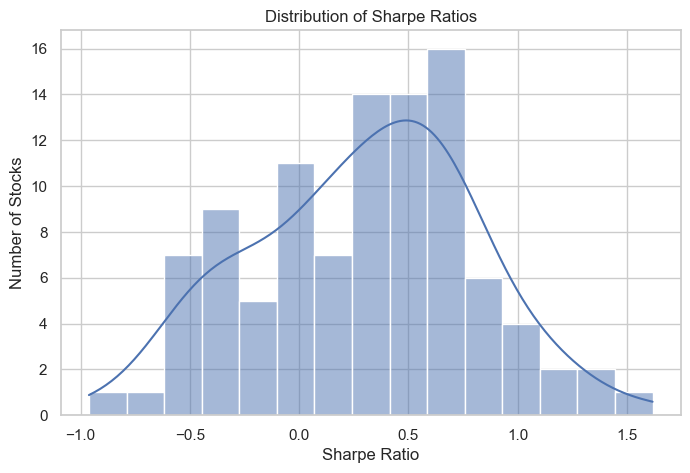

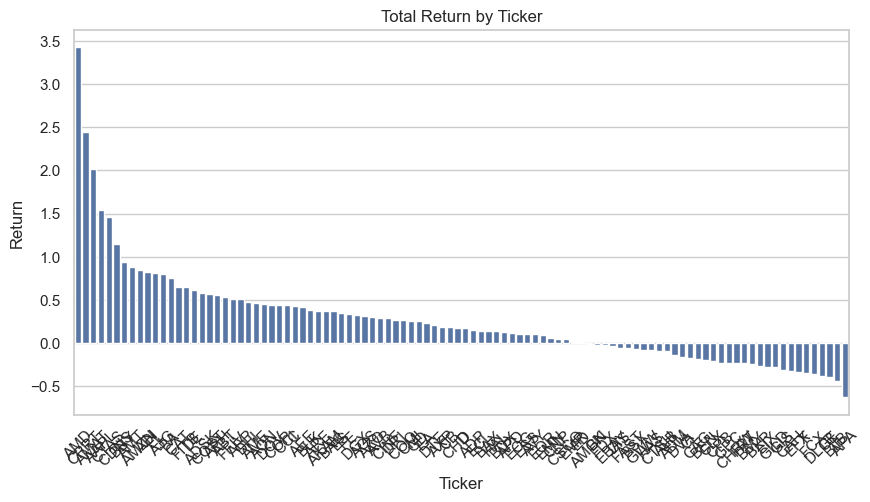

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from performance summary
perf_df = pd.DataFrame(performance_summary)

# Display summary statistics
print("\n=== Summary Statistics ===")
print(perf_df.describe().round(4))

# Mean values
mean_metrics = perf_df[['Return', 'Sharpe Ratio', 'Final Value', 'Max Drawdown']].mean()
print("\n=== Mean Metrics ===")
print(mean_metrics.round(4))

# --- Plots ---
sns.set(style="whitegrid")

# 1. Histogram of Sharpe Ratios
plt.figure(figsize=(8, 5))
sns.histplot(perf_df['Sharpe Ratio'], kde=True, bins=15)
plt.title('Distribution of Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Number of Stocks')
plt.show()

# 2. Bar chart of Returns (sorted by Return)
plt.figure(figsize=(10, 5))
sorted_df = perf_df.sort_values(by='Return', ascending=False)
sns.barplot(x='Ticker', y='Return', data=sorted_df)
plt.title('Total Return by Ticker')
plt.ylabel('Return')
plt.xticks(rotation=45)
plt.show()

# 3. Optional: Save results to CSV
perf_df.to_csv('backtest_mavg_results_universal_params.csv', index=False)

In [ ]:
# --- Plot Cumulative PnL ---
plt.figure(figsize=(12, 6))

# Plot cumulative PnL for each stock
for ticker in perf_df['Ticker']:
    data_handler = DataHandler(ticker=ticker, start_date='2015-12-12', end_date='2019-12-25')
    data = data_handler.fetch_data()

    strategy = MovingAverage(
        short_window=50,
        long_window=100,
        mode="crossover",
        invert_signals=False
    )
    backtest = Backtest(data, strategy, plot_results=False)
    pnl_series = backtest.get_portfolio_value_series()

    plt.plot(pnl_series, label=ticker)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Cumulative PnL of All Strategies')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.tight_layout()
plt.show()
